In [42]:
import pandas as pd
import numpy as np
import os
from skimage.transform import resize

import random
from sklearn.model_selection import train_test_split
from matplotlib.image import imread
from matplotlib import pyplot
from IPython.display import Image
from PIL import Image as I

OUTFILE = "../data/"
DATA_DIR = OUTFILE+"leedsbutterfly"
DESC_DIR = DATA_DIR + "/descriptions/"
IMG_DIR = DATA_DIR + "/images/"

print("Setup all imports")

# Input: 28x28 RGB (.png?) image of a butterfly
# Output: Info about the butterfly picture given

# TODO:
# Rework entire dataframe, each image array should have a name, not a name have a list of image arrays DONE
# Rework following code so it can fit into a correct sized matrix, we need a matrix with same batch sizes for later

Setup all imports


In [26]:
my_dict = {
#     "Name": [],
    "Scientific Name": [],
#     "Description": [],
    "Image Files": [],
    "Image Arrays": [],
}
for f in os.listdir(DESC_DIR):
    file_dir = DESC_DIR + f"/{f}"
    with open(file_dir, 'r') as d:
        lines = d.readlines()
        for i in os.listdir(IMG_DIR):
            if i.startswith(f[:3]): 
                my_dict["Image Files"].append(i)
                my_dict["Scientific Name"].append(lines[0].strip())
                my_dict["Image Arrays"].append(resize(imread(IMG_DIR + i), (128,128,3)))
# my_dict

In [27]:
df = pd.DataFrame.from_dict(my_dict)

Papilio cresphontes


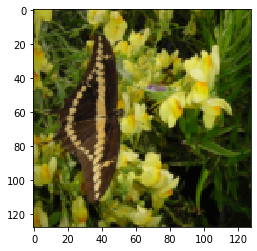

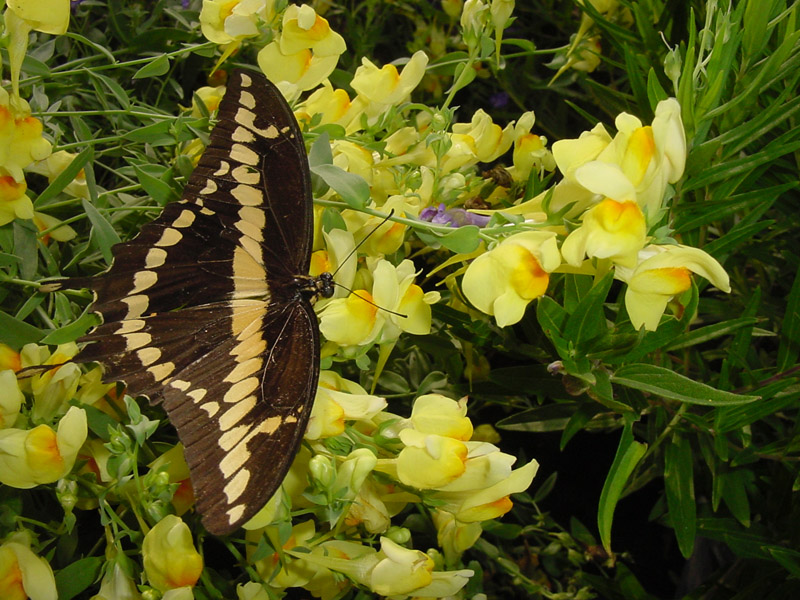

In [4]:
# This cell is solely to test how our DataFrame is structured and how to use it
species = df.iloc[random.randint(0,len(df.index))]
image = IMG_DIR + species["Image Files"]

print(species["Scientific Name"])
pyplot.imshow(species["Image Arrays"])
pyplot.show()
Image(filename=image)

In [46]:
# Save the new DataFrame
csv_save = OUTFILE + "dataframe.csv"
array_save = OUTFILE + "image_arrays.npy"
label_save = OUTFILE + "label_arrays.npy"

df.to_csv(csv_save)
print(f"Saved the unreliable CSV to {csv_save}")

np.save(array_save, df["Image Arrays"].values)
np.save(label_save, df["Scientific Name"].values)
print(f"Saved the image arrays to {array_save} and the labels to {label_save}")

Saved the unreliable CSV to ../data/dataframe.csv
Saved the image arrays to ../data/image_arrays.npy and the labels to ../data/label_arrays.npy


Heliconius erato


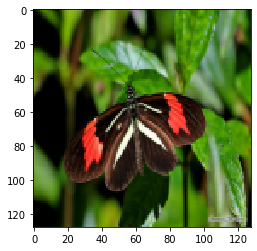

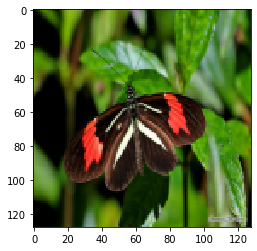

In [49]:
t1 = np.load(array_save, allow_pickle=True)
t2 = np.load(label_save, allow_pickle=True)

print(t2[0])
pyplot.imshow(t1[0])
pyplot.show()

pyplot.imshow(df.iloc[0]["Image Arrays"])
pyplot.show()